In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # data visualization

In [ ]:
#url https://od.data.gov.sa/Data/en/dataset/public-education-data-for-the-year-1444-ah

file_path = 'data.xls'
data = pd.read_excel('/content/schools-classes-students-teachers-and-administrators-for-the-year-1443-.xlsx')

In [ ]:
data.shape

(33, 16)

In [ ]:
data.columns

Index(['السنة', 'السنة ميلادي', 'المنطقة الإدارية', 'إدارة التعليم',
       'المرحلة ', 'السلطة', 'نوع المدرسة', 'نوع التعليم', 'جنس المدرسة',
       'المدارس', 'الفصول', 'الطلبة', 'المعلمين', 'الاداريون', 'الخدم',
       'العمال'],
      dtype='object')

In [ ]:
data.head()

,السنة,السنة ميلادي,المنطقة الإدارية,إدارة التعليم,المرحلة,السلطة,نوع المدرسة,نوع التعليم,جنس المدرسة,المدارس,الفصول,الطلبة,المعلمين,الاداريون,الخدم,العمال
0,1443,2022.0,الباحة,إدارة التعليم بمحافظة المخواة,المرحلة المتوسطة,حكومي,تحفيظ,تحفيظ بنين,بنين,6,19,291,75,2,0,0
1,1443,2022.0,الباحة,إدارة التعليم بمحافظة المخواة,المرحلة المتوسطة,حكومي,تربية خاصة,تربيه خاصة بنين,بنين,9,17,30,7,0,0,0
2,1443,2022.0,الباحة,إدارة التعليم بمحافظة المخواة,المرحلة المتوسطة,حكومي,تعليم الكبار,تعليم عام بنين,بنين,2,6,48,0,0,0,0
3,1443,2022.0,الباحة,إدارة التعليم بمحافظة المخواة,المرحلة المتوسطة,حكومي,نهاري,تعليم عام بنين,بنين,39,152,2886,417,21,0,2
4,1443,2022.0,الباحة,إدارة التعليم بمحافظة المخواة,المرحلة الثانوية,حكومي,تحفيظ,تحفيظ بنين,بنين,2,10,46,14,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   السنة             33 non-null     object 
 1   السنة ميلادي      32 non-null     float64
 2   المنطقة الإدارية  32 non-null     object 
 3   إدارة التعليم     32 non-null     object 
 4   المرحلة           32 non-null     object 
 5   السلطة            32 non-null     object 
 6   نوع المدرسة       32 non-null     object 
 7   نوع التعليم       32 non-null     object 
 8   جنس المدرسة       32 non-null     object 
 9   المدارس           33 non-null     int64  
 10  الفصول            33 non-null     int64  
 11  الطلبة            33 non-null     int64  
 12  المعلمين          33 non-null     int64  
 13  الاداريون         33 non-null     int64  
 14  الخدم             33 non-null     int64  
 15  العمال            33 non-null     int64  
dtypes: float64(1), int64(7), object(8)
memory usag

In [ ]:
data.nunique()

السنة                2
السنة ميلادي         1
المنطقة الإدارية     1
إدارة التعليم        2
المرحلة              3
السلطة               3
نوع المدرسة          5
نوع التعليم          6
جنس المدرسة          1
المدارس             17
الفصول              24
الطلبة              31
المعلمين            25
الاداريون           13
الخدم                4
العمال               8
dtype: int64

In [ ]:
data.isna().sum()

السنة               0
السنة ميلادي        1
المنطقة الإدارية    1
إدارة التعليم       1
المرحلة             1
السلطة              1
نوع المدرسة         1
نوع التعليم         1
جنس المدرسة         1
المدارس             0
الفصول              0
الطلبة              0
المعلمين            0
الاداريون           0
الخدم               0
العمال              0
dtype: int64

In [ ]:
data['المرحلة ']=data['المرحلة '].str.strip()

In [ ]:
# Identify  columns with missing values
categorical_columns = ['السنة ميلادي', 'المرحلة ','المنطقة الإدارية', 'إدارة التعليم', 'السلطة','نوع المدرسة','نوع التعليم','جنس المدرسة']  # Replace with your column names

# Impute missing values with mode
for column in categorical_columns:
    mode_value = data[column].mode()[0]  # Calculate the mode (most frequent category)
    data[column].fillna(mode_value, inplace=True)  # Replace missing values with mode

# Verify that missing values have been handled
print(data.isnull().sum())  # Check the count of missing values in each column

السنة               0
السنة ميلادي        0
المنطقة الإدارية    0
إدارة التعليم       0
المرحلة             0
السلطة              0
نوع المدرسة         0
نوع التعليم         0
جنس المدرسة         0
المدارس             0
الفصول              0
الطلبة              0
المعلمين            0
الاداريون           0
الخدم               0
العمال              0
dtype: int64


In [ ]:
print("duplicated rows in the dataset: ",data.duplicated().sum())

duplicated rows in the dataset:  0


**Exploration Data Analysis (EDA)**

In [ ]:
#Statistical analysis of catagorical features
data.describe(include='object').T

,count,unique,top,freq
السنة,33,2,1443,32
المنطقة الإدارية,33,1,الباحة,33
إدارة التعليم,33,2,الإدارة العامة للتعليم بمنطقة الباحة,21
المرحلة,33,3,المرحلة الثانوية,12
السلطة,33,3,حكومي,27
نوع المدرسة,33,5,نهاري,13
نوع التعليم,33,6,تعليم عام بنين,12
جنس المدرسة,33,1,بنين,33


In [ ]:
#Statistical analysis of numerical features
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
السنة ميلادي,33.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
المدارس,33.0,29.151515,84.336796,1.0,2.0,6.0,11.0,481.0
الفصول,33.0,130.000000,380.533425,3.0,7.0,14.0,47.0,2145.0
الطلبة,33.0,2111.333333,6262.675884,9.0,34.0,86.0,581.0,34837.0
المعلمين,33.0,304.242424,903.039833,0.0,5.0,18.0,91.0,5020.0
الاداريون,33.0,23.636364,72.533104,0.0,0.0,0.0,4.0,390.0
الخدم,33.0,0.303030,0.951474,0.0,0.0,0.0,0.0,5.0
العمال,33.0,2.909091,8.969963,0.0,0.0,0.0,0.0,48.0


Visulaization

In [ ]:
# top 10 show in the dataset
color = ['#3c8283']
values = data['نوع التعليم'].value_counts()[:10]

fig = px.bar(x=values.index,
             y=values.values,
             title="انواع التعليم",
             labels={'x':'نوع المرحلة الدراسية', 'y':'العدد'},
             color_discrete_sequence = color * len(values),
             template="simple_white",
             text=['{}'.format(p) for p in values.values]
            )
fig.show()

In [ ]:
data = data.groupby('نوع التعليم', as_index=False).apply(lambda x: x.sample(n=10000, random_state=40)).reset_index(drop=True)
gender_df.head(4)

ValueError: ignored

In [ ]:
Category=data['نوع التعليم']
gender_category_groupby = data.groupby(by=["السلطة",'نوع التعليم']).size().reset_index(name="counts")
fig = px.pie( values=gender_category_groupby.counts,
             names=gender_category_groupby.Category,
             facet_col=gender_category_groupby.SpeakerGender,
             color_discrete_sequence = px.colors.sequential.tempo,
             title='The distribution of show Categories based on gender')
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.show()


AttributeError: ignored

In [ ]:
# Delete the column
data = data.drop('السنة ميلادي', axis=1)

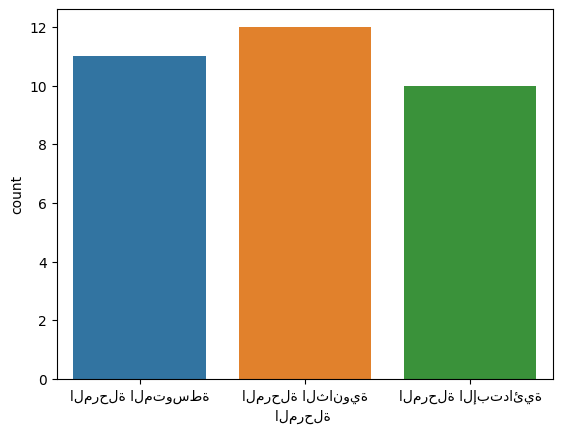

In [ ]:
sns.countplot(data = data , x ='المرحلة ');

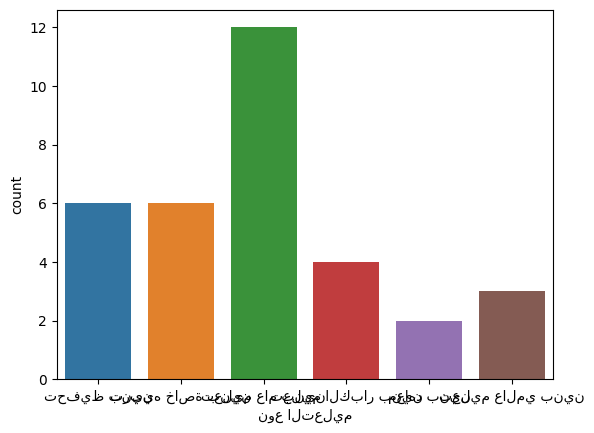

In [ ]:
sns.countplot(data = data , x ='نوع التعليم');


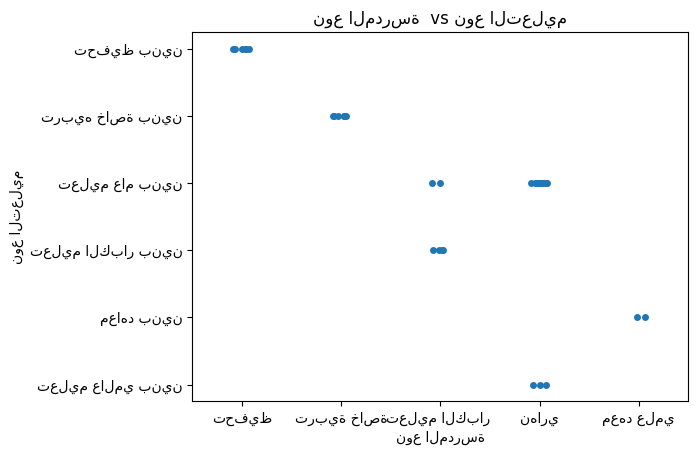

In [ ]:
# Specify the columns for x-axis and y-axis
x = 'نوع المدرسة'
y = 'نوع التعليم'

# Create the plot
sns.stripplot(x=x, y=y, data=data, jitter=True)

# Set the plot title and axis labels
plt.title('نوع المدرسة  vs نوع التعليم')
plt.xlabel('نوع المدرسة')
plt.ylabel('نوع التعليم')

# Display the plot
plt.show()